In [35]:
#import dependencies
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
# add gridlines to each of my .plt plots
import matplotlib.pyplot as plt
print(plt.style.available) #check what styles are available
plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.use('seaborn-v0_8-notebook')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
# Load CSV from a folder named 'Resources'
survey_df = pd.read_csv('../Resources/MentalHealthTechWorkplace2014.csv')
survey_df.head(15)

# # There's an option to download via pulling latest copy from Kaggle API. can explore later
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")

# print("Path to dataset files:", path)

## how to use Kaggle API: https://www.kaggle.com/docs/api#authentication

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [3]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
survey_df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### Some notes to myself:
- will need to update gender to Male, Famle, and Other if applicable. Some Males put M or lowercase male or female instead and it will be categorized as a different value. also have at least 1 "agender" and one that has "cis", "male-leaning", "trans", "androdgynous" (sp?), "not sure what that really means", and more
- need to check how counties were input (dropdown ok but if manual entry, need to check for abbreviations and spelling errors)
- same for state
- figure out what to do for state NaNs... if I'll even use them as features, that is
- can explore comments (maybe code them based on something - manually or LLM?)
- I have time and data timestamps. may need to import timestamp (sub-)library. but it's marked as object datatype...
- only got .describe() for age due to being only numerical... can I do something similar with time? or is it better to do viz to check the others?
- need to check non-nulls of self-employed (Y/N or other format?)
- all Y/N can be made encoded binary (**CHECK WHICH ARE y/n ONLY. SOME ARE 3 CHOICES WITH maybe**) and categories (Little/Lot/No/etc.) can be encoded with dummies?
- scaled numerical (ex. age) can use standard scalar?
- may group tech_company: all tech workers(CHECK IF THIS IS TRUE) but group by primarily a tech company vs not (**NEED TO SEE HOW FORMATTED**)
- I'd like to have some consideration for the comments given (ex. not feel supported but all positive answers aside from comment, low understanding of MH support evidenced in comment, started in new job so not sure about response (more than 1 of these), etc.)
- row 990 can be dropped: "8 year old" not responding helpfully. maybe check big outliers for age and any other relevant columns. need to figure out a system for gender (and comments?)
- check to see how much left after fix gender values, do whatev with nulls, etc --> see if want to limit to just US.
- 1259 rows... should be OK for ML (cluster or regression... prob regression if predicting TBH).

In [5]:
# preview the columns that were cut off in general .head() above
survey_df[["remote_work", "tech_company", "benefits", "care_options", "wellness_program", "seek_help", "anonymity"]].head()

,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity
0,No,Yes,Yes,Not sure,No,Yes,Yes
1,No,No,Don't know,No,Don't know,Don't know,Don't know
2,No,Yes,No,No,No,No,Don't know
3,No,Yes,No,Yes,No,No,No
4,Yes,Yes,Yes,No,Don't know,Don't know,Don't know


In [6]:
# how many nulls
pprint(survey_df.isnull().sum())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [7]:
# preview some of the nulls for all the columns
nulls_df = survey_df[survey_df.isnull().any(axis=1)]
nulls_df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


### More Notes to Self:
- seemingly all of the rows have at least 1 null value; sometimes comments, sometimes self-employed Q, work interfere, state
- I don't see issue with NaNs in comments, so far.
- **need to check what a null for self-employed even means/implies...same for work interfere and state**

In [8]:
# preview some of the non-null comments
non_null_comments = survey_df[survey_df['comments'].notnull()]
non_null_comments.head(20)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
13,2014-08-27 11:33:26,36,Male,United States,CT,NaN,Yes,No,Never,500-1000,...,Don't know,No,No,Yes,Yes,No,No,Don't know,No,I'm not on my company's health insurance which...
15,2014-08-27 11:34:00,29,female,United States,IL,NaN,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...
16,2014-08-27 11:34:20,23,Male,United Kingdom,NaN,NaN,No,Yes,Sometimes,26-100,...,Very easy,Maybe,No,Some of them,No,Maybe,Maybe,No,No,My company does provide healthcare but not to ...
24,2014-08-27 11:36:48,33,male,United States,CA,No,Yes,Yes,Rarely,26-100,...,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
25,2014-08-27 11:37:08,35,male,United States,TN,No,Yes,Yes,Sometimes,More than 1000,...,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...
33,2014-08-27 11:39:36,42,Male,United States,WA,No,Yes,Yes,Sometimes,26-100,...,Very easy,Maybe,No,Some of them,Some of them,Maybe,Yes,Don't know,No,I selected my current employer based on its po...
45,2014-08-27 11:43:36,38,Female,United States,TX,No,Yes,Yes,Sometimes,26-100,...,Somewhat easy,No,No,Some of them,Yes,No,No,Yes,No,Our health plan has covered my psychotherapy a...
49,2014-08-27 11:44:43,30,male,United States,IL,No,Yes,Yes,Rarely,26-100,...,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No,I just started a new job last week hence a lot...
59,2014-08-27 11:47:56,33,male,Canada,NaN,No,Yes,Yes,Often,6-25,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,In addition to my own mental health issues I'v...
66,2014-08-27 11:51:34,23,Female,Australia,NaN,No,Yes,Yes,Often,1-5,...,Very easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Thanks for doing this research.


In [9]:
pprint(non_null_comments['comments'])

13      I'm not on my company's health insurance which...
15      I have chronic low-level neurological issues t...
16      My company does provide healthcare but not to ...
24                    Relatively new job. Ask again later
25      Sometimes I think  about using drugs for my me...
                              ...                        
1223    Although my employer does everything they can ...
1232    I work at a large university with a track reco...
1234    i'm in a country with social health care so my...
1245    In australia all organisations of a certain si...
1249                                    Bipolar disorder 
Name: comments, Length: 164, dtype: object


In [10]:
#explore instances where state is null, but country is not; could be that NaNs at 'state' are due to out-of-USA participants...
NullStates = survey_df[survey_df['state'].isnull()]
NullStates_country = NullStates[NullStates['Country'].notnull()]
NullStates_country.head(20)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
11,2014-08-27 11:32:49,29,male,Bulgaria,NaN,NaN,No,No,Never,100-500,...,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No,NaN
14,2014-08-27 11:33:57,27,Male,Canada,NaN,NaN,No,No,Never,6-25,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Yes,Yes,No,NaN
16,2014-08-27 11:34:20,23,Male,United Kingdom,NaN,NaN,No,Yes,Sometimes,26-100,...,Very easy,Maybe,No,Some of them,No,Maybe,Maybe,No,No,My company does provide healthcare but not to ...
19,2014-08-27 11:35:08,36,Male,France,NaN,Yes,Yes,No,NaN,6-25,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN
29,2014-08-27 11:38:18,37,Male,United Kingdom,NaN,No,No,No,Sometimes,6-25,...,Very difficult,Yes,Maybe,Some of them,No,No,Maybe,No,No,NaN
30,2014-08-27 11:39:03,32,Male,United Kingdom,NaN,No,No,No,Never,6-25,...,Don't know,Yes,Yes,Some of them,Some of them,No,Maybe,No,No,NaN


In [11]:
pprint(NullStates_country.info())

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 2 to 1254
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  515 non-null    object
 1   Age                        515 non-null    int64 
 2   Gender                     515 non-null    object
 3   Country                    515 non-null    object
 4   state                      0 non-null      object
 5   self_employed              508 non-null    object
 6   family_history             515 non-null    object
 7   treatment                  515 non-null    object
 8   work_interfere             393 non-null    object
 9   no_employees               515 non-null    object
 10  remote_work                515 non-null    object
 11  tech_company               515 non-null    object
 12  benefits                   515 non-null    object
 13  care_options               515 non-null    object
 14  wellness_progr

In [12]:
print(f"The number of participants who had state as null but were also in the USA is: {NullStates_country[NullStates_country['Country'] == 'United States']['Country'].count()}")
NullStates_country[NullStates_country['Country'] == 'United States'].head()

The number of participants who had state as null but were also in the USA is: 11


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
52,2014-08-27 11:45:33,31,M,United States,NaN,No,No,No,NaN,100-500,...,Don't know,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN
294,2014-08-27 14:15:57,56,Male,United States,NaN,No,No,Yes,Never,More than 1000,...,Don't know,No,Maybe,Yes,Some of them,No,Maybe,Don't know,No,NaN
367,2014-08-27 15:13:33,36,Male,United States,NaN,No,Yes,Yes,Often,100-500,...,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
525,2014-08-27 17:32:04,41,Female,United States,NaN,No,Yes,Yes,Rarely,500-1000,...,Very easy,Maybe,Maybe,Some of them,Some of them,No,No,Yes,No,NaN
574,2014-08-27 20:52:20,50,Male,United States,NaN,No,No,No,Never,26-100,...,Don't know,No,No,No,No,No,Maybe,No,No,NaN


In [13]:
# non-USA countries that have null for state column

noUSA_df = survey_df[survey_df['Country'] != 'United States']
# noUSA_df.head()
noUSA_nullStates = noUSA_df[noUSA_df['state'].isnull()]
pprint(noUSA_nullStates.info())
noUSA_nullStates.head()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 2 to 1254
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  504 non-null    object
 1   Age                        504 non-null    int64 
 2   Gender                     504 non-null    object
 3   Country                    504 non-null    object
 4   state                      0 non-null      object
 5   self_employed              497 non-null    object
 6   family_history             504 non-null    object
 7   treatment                  504 non-null    object
 8   work_interfere             385 non-null    object
 9   no_employees               504 non-null    object
 10  remote_work                504 non-null    object
 11  tech_company               504 non-null    object
 12  benefits                   504 non-null    object
 13  care_options               504 non-null    object
 14  wellness_progr

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
11,2014-08-27 11:32:49,29,male,Bulgaria,NaN,NaN,No,No,Never,100-500,...,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No,NaN


In [14]:
# non-USA countries that have values in state column
noUSA_yesStates = noUSA_df[noUSA_df['state'].notnull()]
pprint(noUSA_yesStates.info())
noUSA_yesStates.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 319 to 1179
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  4 non-null      object
 1   Age                        4 non-null      int64 
 2   Gender                     4 non-null      object
 3   Country                    4 non-null      object
 4   state                      4 non-null      object
 5   self_employed              4 non-null      object
 6   family_history             4 non-null      object
 7   treatment                  4 non-null      object
 8   work_interfere             3 non-null      object
 9   no_employees               4 non-null      object
 10  remote_work                4 non-null      object
 11  tech_company               4 non-null      object
 12  benefits                   4 non-null      object
 13  care_options               4 non-null      object
 14  wellness_progr

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
319,2014-08-27 14:28:28,29,male,Latvia,NY,No,No,No,NaN,26-100,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
488,2014-08-27 16:21:54,26,Male,Israel,MD,No,No,No,Sometimes,6-25,...,Very easy,Maybe,No,Some of them,Yes,No,Maybe,Yes,No,Israel has public health insurance for everyon...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1179,2014-09-26 10:05:55,25,female,Bulgaria,UT,No,No,Yes,Sometimes,26-100,...,Don't know,Maybe,Maybe,Yes,Some of them,Maybe,No,No,No,NaN


In [15]:
# any countries are null?
nullCountries = survey_df[survey_df['Country'].isnull()]
nullCountries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  0 non-null      object
 1   Age                        0 non-null      int64 
 2   Gender                     0 non-null      object
 3   Country                    0 non-null      object
 4   state                      0 non-null      object
 5   self_employed              0 non-null      object
 6   family_history             0 non-null      object
 7   treatment                  0 non-null      object
 8   work_interfere             0 non-null      object
 9   no_employees               0 non-null      object
 10  remote_work                0 non-null      object
 11  tech_company               0 non-null      object
 12  benefits                   0 non-null      object
 13  care_options               0 non-null      object
 14  wellness_program           

### decide what to do with nulls - Notes To Self
- if using location (state, country) focus on country, as state has NaNs and we're not sure why (ex. user error, D.C.?, etc.); 4 non-USA partcipants also had US states for their state selection... which is odd. 1 participant reported they were 8 years old. **need to check age distrbution and drop big outliers that don't make sense like the 8 year old**
- check all possible inputs (and their counts) for gender, bc it was typed. work on getting this into uniform M/F/Other bins


In [16]:
yesUSA_df = survey_df[survey_df['Country'] == 'United States']
yesUSA_df.info()
yesUSA_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  751 non-null    object
 1   Age                        751 non-null    int64 
 2   Gender                     751 non-null    object
 3   Country                    751 non-null    object
 4   state                      740 non-null    object
 5   self_employed              740 non-null    object
 6   family_history             751 non-null    object
 7   treatment                  751 non-null    object
 8   work_interfere             607 non-null    object
 9   no_employees               751 non-null    object
 10  remote_work                751 non-null    object
 11  tech_company               751 non-null    object
 12  benefits                   751 non-null    object
 13  care_options               751 non-null    object
 14  wellness_progr

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN


In [17]:
noUSA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 2 to 1254
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  508 non-null    object
 1   Age                        508 non-null    int64 
 2   Gender                     508 non-null    object
 3   Country                    508 non-null    object
 4   state                      4 non-null      object
 5   self_employed              501 non-null    object
 6   family_history             508 non-null    object
 7   treatment                  508 non-null    object
 8   work_interfere             388 non-null    object
 9   no_employees               508 non-null    object
 10  remote_work                508 non-null    object
 11  tech_company               508 non-null    object
 12  benefits                   508 non-null    object
 13  care_options               508 non-null    object
 14  wellness_progr

Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Ireland            27
Netherlands        27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64
'Count of non-top countries: 100'


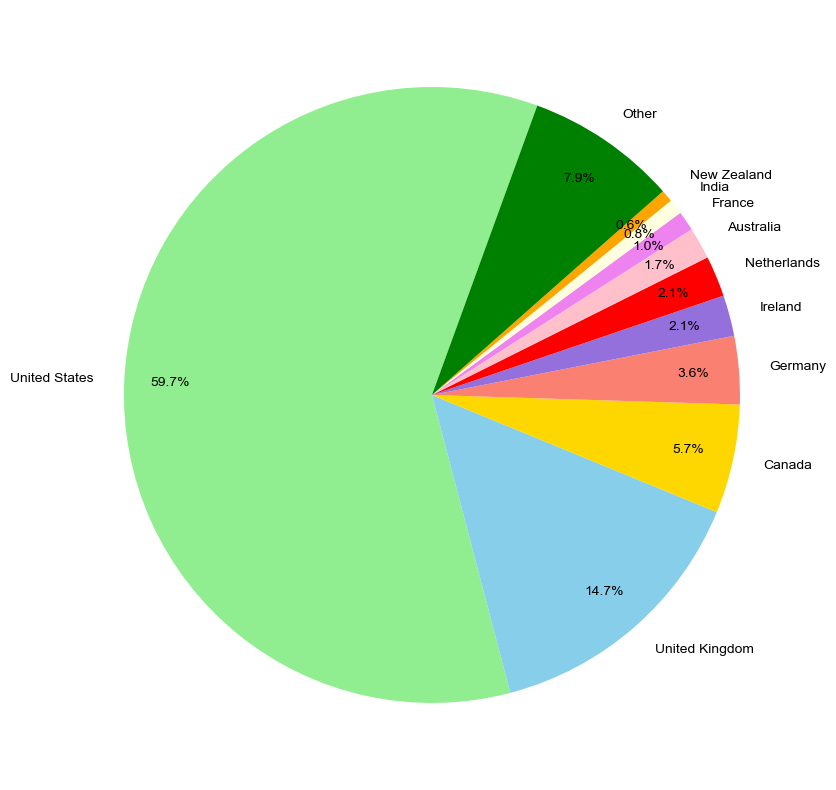

In [44]:
# quick viz for countries
# Count occurrences of each country
country_counts = survey_df['Country'].value_counts()
# pprint(country_counts)

# Optionally limit to top N countries to avoid a cluttered pie chart
top_n = 10
country_counts_top = country_counts[:top_n]
pprint(country_counts_top)
other_count = country_counts[top_n:].sum()
pprint(f"Count of non-top countries: {other_count}")
if other_count > 0:
    country_counts_top['Other'] = other_count

# # Plot the pie chart
# plt.figure(figsize=(6, 6))
# plt.pie(
#     country_counts_top,
#     labels=country_counts_top.index,
#     autopct='%1.1f%%',
#     startangle=140,
#     textprops={'fontsize': 10}
# )
# plt.title('Country Distribution of Survey Respondents')
# plt.tight_layout()
# plt.show()

# Prepare data
labels = country_counts_top.index
sizes = country_counts_top.values

# # Define explode values to separate small slices slightly
# explode = [0.05 if pct < 5 else 0 for pct in (sizes / sizes.sum()) * 100]

# custom colors
colors = ['lightgreen', 'skyblue', 'gold', 'salmon', 'mediumpurple', 'red', 'pink', 'violet', 'lightyellow', 'orange', 'green']

# Plot pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=70,
    pctdistance=0.85,
    colors=colors,
    explode=None,
    textprops=dict(color="black", fontsize=10)
)

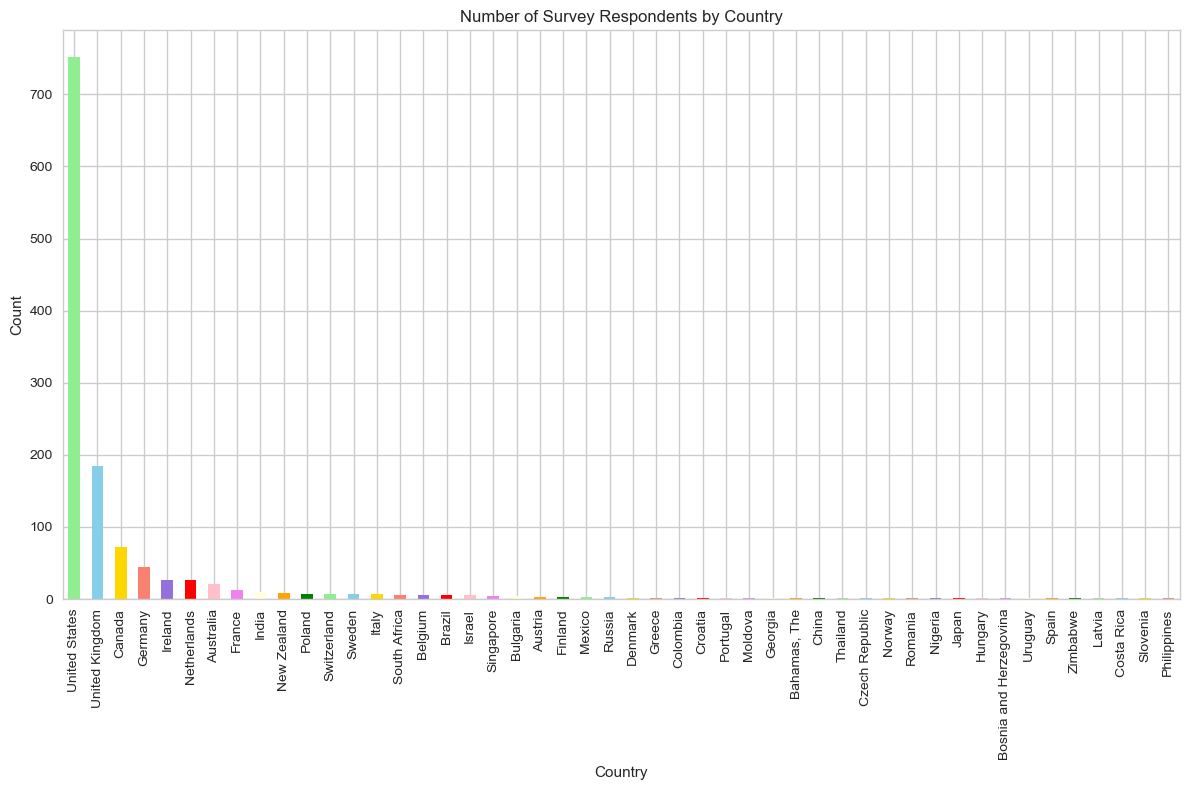

In [36]:
# Other section is huge. might see better with bar chart
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color=colors[:len(country_counts_top)])

plt.title('Number of Survey Respondents by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

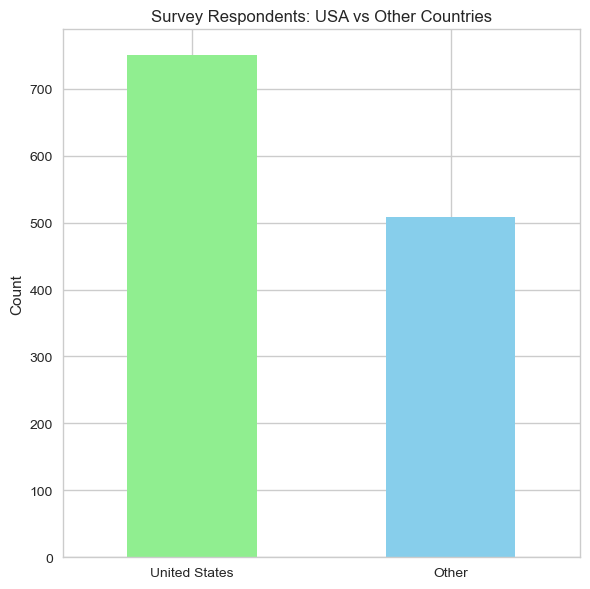

In [37]:
# bar chart USA vs Other (all other countries binned)
# Create USA vs Other counts
usa_count = country_counts.get('United States', 0)
other_count = country_counts.sum() - usa_count

# Prepare data
counts_USAOther = pd.Series({'United States': usa_count, 'Other': other_count})

# Plot
plt.figure(figsize=(6, 6))
# counts.plot(kind='bar', color=['skyblue', 'gray'])
counts_USAOther.plot(kind='bar', color=colors[:len(counts_USAOther)])

plt.title('Survey Respondents: USA vs Other Countries')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

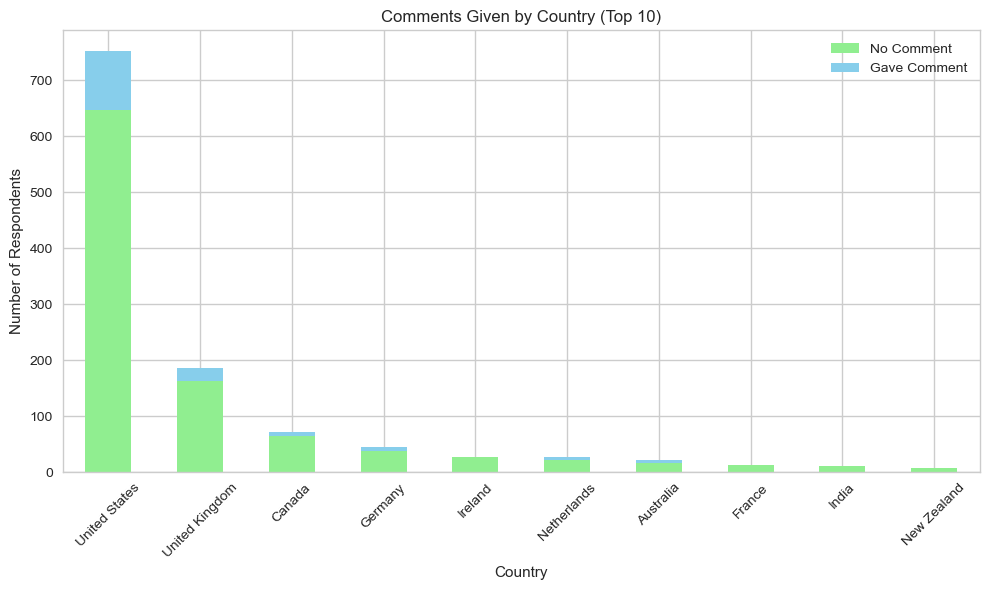

In [38]:
# quick viz on whether gave comment by country
# Create a binary column: "Yes" if comment exists, "No" if NaN
survey_df['gave_comment'] = survey_df['comments'].notnull().map({True: 'Yes', False: 'No'})

# Group by country and comment presence
comment_by_country = survey_df.groupby(['Country', 'gave_comment']).size().unstack(fill_value=0)
comment_by_country = comment_by_country.sort_values(by='No', ascending=False)

# Keep top countries only
top_countries = survey_df['Country'].value_counts().head(10).index
comment_by_country = comment_by_country.loc[comment_by_country.index.isin(top_countries)]

# Plot
comment_by_country.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors[:len(comment_by_country)])

plt.title('Comments Given by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.legend(['No Comment', 'Gave Comment'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

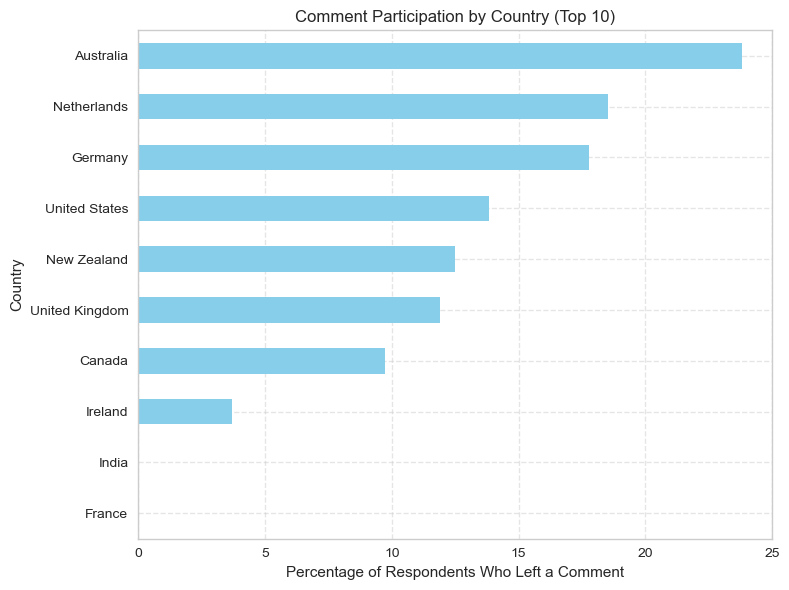

In [46]:
# percent of commenters per country
comment_percent = comment_by_country.div(comment_by_country.sum(axis=1), axis=0) * 100

# comment_percent.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors[:len(comment_by_country)])
# plt.title('Percentage of Comments Given by Country (Top 10)')
# plt.xlabel('Country')
# plt.ylabel('Percentage')
# plt.legend(['No Comment', 'Gave Comment'], loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

comment_percent['Yes'].sort_values().plot(kind='barh', color='skyblue', figsize=(8, 6))
plt.xlabel('Percentage of Respondents Who Left a Comment')
plt.title('Comment Participation by Country (Top 10)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

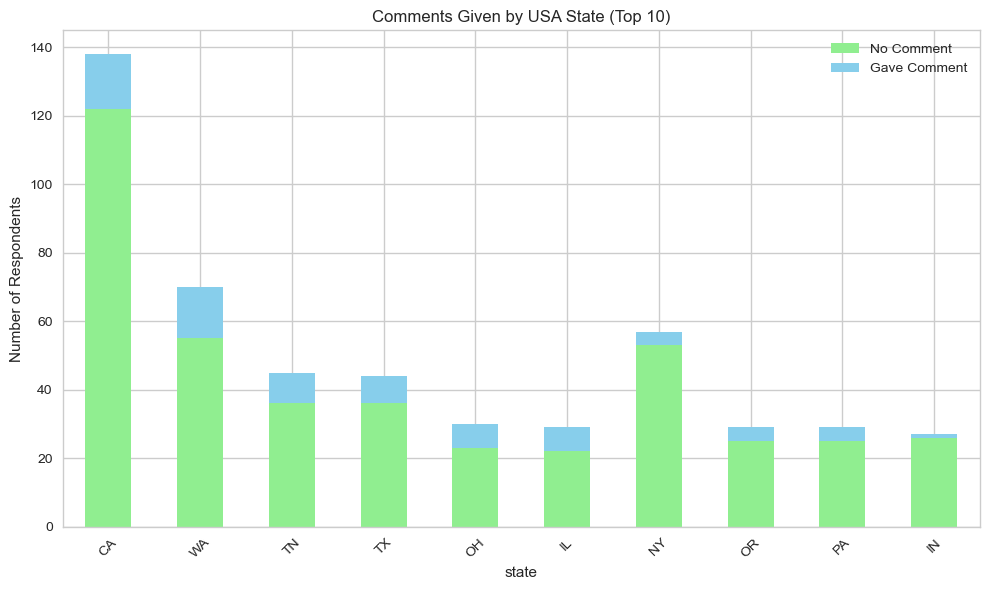

In [47]:
#  gave comment by state (US Only)
comment_by_USAstate = survey_df.groupby(['state', 'gave_comment']).size().unstack(fill_value=0)
comment_by_USAstate = comment_by_USAstate.sort_values(by='Yes', ascending=False)

# Keep top states only
top_states = survey_df['state'].value_counts().head(10).index
comment_by_USAstate = comment_by_USAstate.loc[comment_by_USAstate.index.isin(top_states)]

# Plot
comment_by_USAstate.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors[:len(comment_by_USAstate)])

plt.title('Comments Given by USA State (Top 10)')
plt.xlabel('state')
plt.ylabel('Number of Respondents')
plt.legend(['No Comment', 'Gave Comment'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

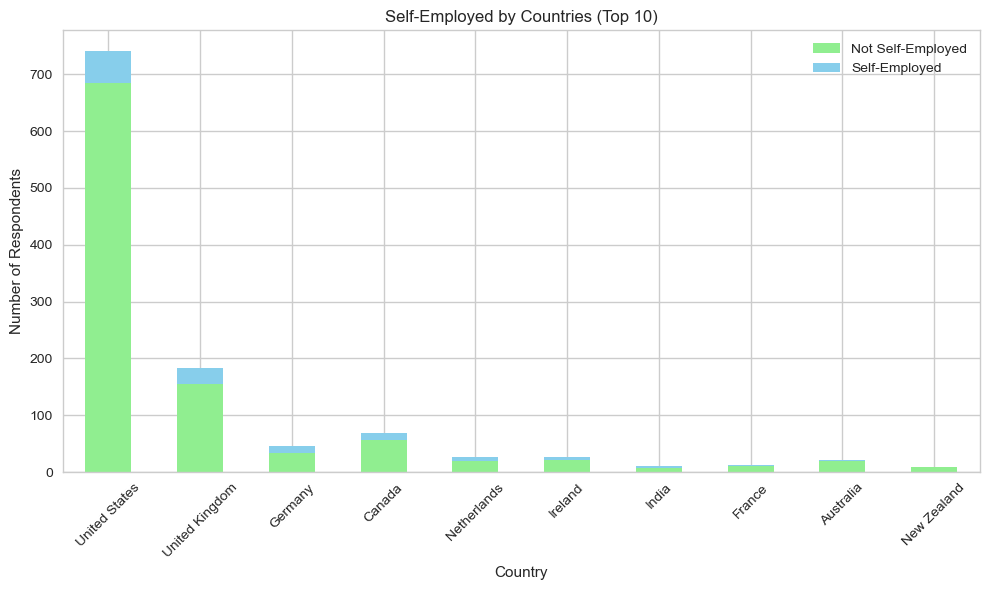

In [58]:
# quick viz self employed by country
selfEmployed_by_country = survey_df.groupby(['Country', 'self_employed']).size().unstack(fill_value=0)
selfEmployed_by_country = selfEmployed_by_country.sort_values(by='Yes', ascending=False)
selfEmployed_by_country.head(10)

selfEmployed_by_country = selfEmployed_by_country.loc[selfEmployed_by_country.index.isin(top_countries)] 
#NOTE TO SELF: here, top_states is by number respondents from the state, not necessarily the highest number of self-employed responses so far

# Plot
selfEmployed_by_country.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors[:len(selfEmployed_by_country)])

plt.title('Self-Employed by Countries (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.legend(['Not Self-Employed', 'Self-Employed'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



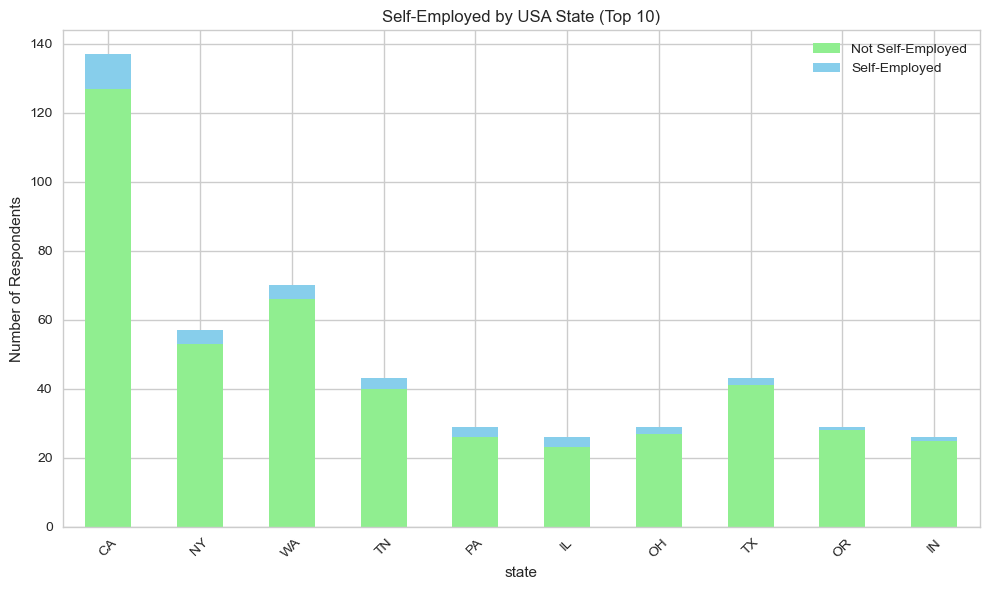

In [57]:
# slef-employed by state
selfEmployed_by_USAstate = survey_df.groupby(['state', 'self_employed']).size().unstack(fill_value=0)
selfEmployed_by_USAstate = selfEmployed_by_USAstate.sort_values(by='Yes', ascending=False)
selfEmployed_by_USAstate.head(10)

selfEmployed_by_USAstate = selfEmployed_by_USAstate.loc[selfEmployed_by_USAstate.index.isin(top_states)] 
#NOTE TO SELF: here, top_states is by number respondents from the state, not necessarily the highest number of self-employed responses so far

# Plot
selfEmployed_by_USAstate.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors[:len(selfEmployed_by_USAstate)])

plt.title('Self-Employed by USA State (Top 10)')
plt.xlabel('state')
plt.ylabel('Number of Respondents')
plt.legend(['Not Self-Employed', 'Self-Employed'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Notes To Self
- self-employed seems to be only small chunk of respondents on global and USA-state levels. Can keep for now, but maybe potentially drop.
- Leaning toward using countries as a feature (instead of states) but need to check what counts look like once drop NaNs or weird outliers (ex. USA states but non-US country, 8 year old respondent)

In [73]:
# check ages for weird input
pprint(survey_df['Age'].sort_values().head(10))
pprint(survey_df['Age'].sort_values().tail(10))


715    -1726
143      -29
1127      -1
734        5
989        8
1090      11
282       18
287       18
43        18
482       18
Name: Age, dtype: int64
466              57
471              58
1236             60
297              60
952              61
520              62
560              65
1182             72
364             329
390     99999999999
Name: Age, dtype: int64


### Notes To Self
- Ages have errors: (at low age range) -1726, -29, -1, 5, 8, 11 AND (at high age range) 99999999999, 329. 

In [ ]:
# Drop weird ages
# Option 1: Remove rows where age is less than 18
survey_df_clean = survey_df[survey_df['age'] >= 18]

# Option 2: Use IQR to detect and remove outliers
Q1 = survey_df['age'].quantile(0.25)
Q3 = survey_df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds (e.g., ages below 18 or above 100)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
survey_df_clean = survey_df[(survey_df['age'] >= lower_bound) & (survey_df['age'] <= upper_bound)]

# Check how many rows remain
print(f"Rows after removing outliers: {survey_df_clean.shape[0]}")

In [70]:
# FIX ISSUE WITH BINS OR IMPORT SEABORN AND DO BOXPLOT
# # viz ages (check for outliers that don't make sense ex. 8 years old)
# survey_df['Age'].plot(kind='hist', bins=3, figsize=(10, 6), color='lightblue', edgecolor='black')
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show() 


In [ ]:
# viz for year (or month-year) participants responded

In [ ]:
# quick viz to see the various columns' distributions/trends


### Need to Clean So Far:
- drop participants with odd ages
- drop participants with non-USA countries that have USA states input
- ]

#### Prep for Features for ML
- encode yes/no (binary) and yes/no/maybe/etc. (scaled? dummies?)
- do PCA to see what features may be more predictive/important
- (depending on PCA)
    1. drop comments (and comments_given) (can do future NLP on comments and use as feature?)
    2. 
- 

### Keep in Mind for Write-Up
- majority of US respondents are from CA, which may skew results and not be as representative of whole country's tech workers. Though one could argue that since CA (and other top respondent countries) is a tech hub in the US that it can be a quick snapshot, I would argue that there are other factors in these areas that can affect mental health greatly (ex. CA being known for Hollywood and high beauty standards and actors not "making it").
- chose to drop respondents that input odd ages, locations (US states despite not in the USA), []. Posisbly no big difference, but worth it to keep this in mind.
- due to high cost of living for some of the top locations, I wonder if high cost of living or financial constraints have more correlation that some of these features in the survey
- []